In [1]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib
import scipy.stats as stats # for zscore  

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV


columns = ['T_e','T_bb','tau_T','E','Mu','I','U']

# Data Analysis 

In [2]:
import pandas as pd
data_path="D:\Downloads\data_AMP_PCS_reduced.csv"
df= pd.read_csv(data_path,names=columns)
print (df)



           T_e   T_bb  tau_T         E        Mu             I           U
0          0.0  1.000    2.0  3.000000  4.000000      5.000000    6.000000
1         40.0  0.001    0.5  0.000200  0.015920    167.714879  -14.460404
2         40.0  0.001    0.5  0.000212  0.806686    763.139341   -0.846367
3         40.0  0.001    0.5  0.000240  0.337873    678.207806   -8.096192
4         40.0  0.001    0.5  0.000272  0.015920    488.677115  -38.014348
...        ...    ...    ...       ...       ...           ...         ...
1258286  200.0  0.003    3.5  1.216844  0.806686  27355.236574  420.487611
1258287  200.0  0.003    3.5  1.376975  0.337873  20414.520050  806.619797
1258288  200.0  0.003    3.5  1.558179  0.015920   7554.380847  139.930834
1258289  200.0  0.003    3.5  1.657536  0.806686   6008.720326   81.745023
1258290  200.0  0.003    3.5  1.875661  0.337873   3565.451966  129.979284

[1258291 rows x 7 columns]


In [3]:

print (df.dtypes)
print (df.shape)

T_e      float64
T_bb     float64
tau_T    float64
E        float64
Mu       float64
I        float64
U        float64
dtype: object
(1258291, 7)


In [4]:
df_small = df.sample(100000)
df_small_5K= df.sample(5000)


In [5]:
size_df = len(df)
size_df_1 =len(df_small)
size_df_2=len(df_small_5K)


df.dropna(axis=0,how='any',inplace=True)
df_small.dropna(axis=0,how='any',inplace=True)
df_small_5K.dropna(axis=0,how='any',inplace=True)

print(size_df-len(df),"empty rows removed in full dataset")
print(size_df_1-len(df_small),"empty rows removed in 10K dataset")
print(size_df_2-len(df_small_5K),"empty rows removed in 5K dataset")

0 empty rows removed in full dataset
0 empty rows removed in 10K dataset
0 empty rows removed in 5K dataset


In [6]:
df_min_maxed= pd.DataFrame()
for a, b in enumerate(df):
    df_min_maxed[b]= minmax_scale(df[b])
print(df_min_maxed)

         T_e      T_bb  tau_T         E        Mu         I         U
0        0.0  1.000000    0.5  1.000000  1.000000  0.000006  0.757891
1        0.2  0.000000    0.0  0.000000  0.000000  0.000209  0.757203
2        0.2  0.000000    0.0  0.000004  0.198481  0.000953  0.757661
3        0.2  0.000000    0.0  0.000014  0.080810  0.000847  0.757417
4        0.2  0.000000    0.0  0.000024  0.000000  0.000610  0.756411
...      ...       ...    ...       ...       ...       ...       ...
1258286  1.0  0.002002    1.0  0.405575  0.198481  0.034155  0.771832
1258287  1.0  0.002002    1.0  0.458956  0.080810  0.025489  0.784820
1258288  1.0  0.002002    1.0  0.519361  0.000000  0.009432  0.762396
1258289  1.0  0.002002    1.0  0.552482  0.198481  0.007502  0.760439
1258290  1.0  0.002002    1.0  0.625195  0.080810  0.004452  0.762061

[1258291 rows x 7 columns]


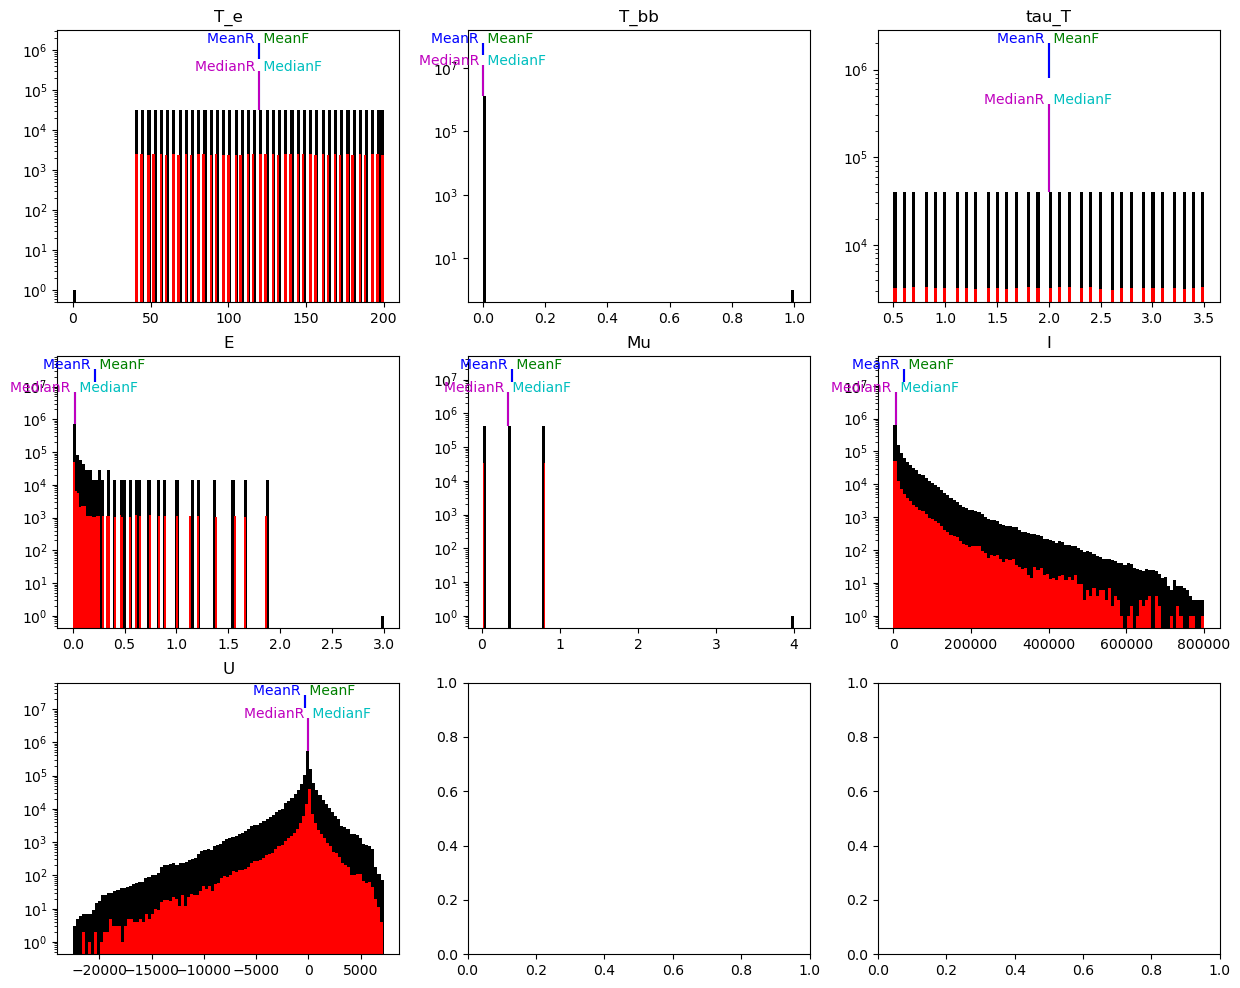

In [7]:
def make_histograms(data1,data2):

    import matplotlib.pyplot as plt
    f, ax = plt.subplots(3,3,figsize=[15,12])
    for i,c in enumerate(data1.columns):
        y, x, _ = ax[i//3][i%3].hist(data1[c],bins=100,color='k')
        _ = ax[i//3][i%3].hist(data2[c],bins=100,color='r')
        ax[i//3][i%3].set_title(c)
        ax[i//3][i%3].set_yscale('log')
        medianfull = np.median(data1[c])
        medianredc = np.median(data2[c])

        meanfull = np.mean(data1[c])
        meanredc = np.mean(data2[c])

        ax[i//3][i%3].vlines(medianfull,y.max(),y.max()*10,color='c')
        ax[i//3][i%3].vlines(medianredc,y.max(),y.max()*10,color='m')
        ax[i//3][i%3].text(medianfull,y.max()*10,' MedianF',ha='left',color='c') # "F" means full
        ax[i//3][i%3].text(medianredc,y.max()*10,'MedianR ',ha='right',color='m') # "R" means reduced

        ax[i//3][i%3].vlines(meanfull,y.max()*20,y.max()*50,color='g')
        ax[i//3][i%3].vlines(meanredc,y.max()*20,y.max()*50,color='b')
        ax[i//3][i%3].text(meanfull,y.max()*50,' MeanF',ha='left',color='g')
        ax[i//3][i%3].text(meanredc,y.max()*50,'MeanR ',ha='right',color='b')
        
make_histograms(df,df_small)

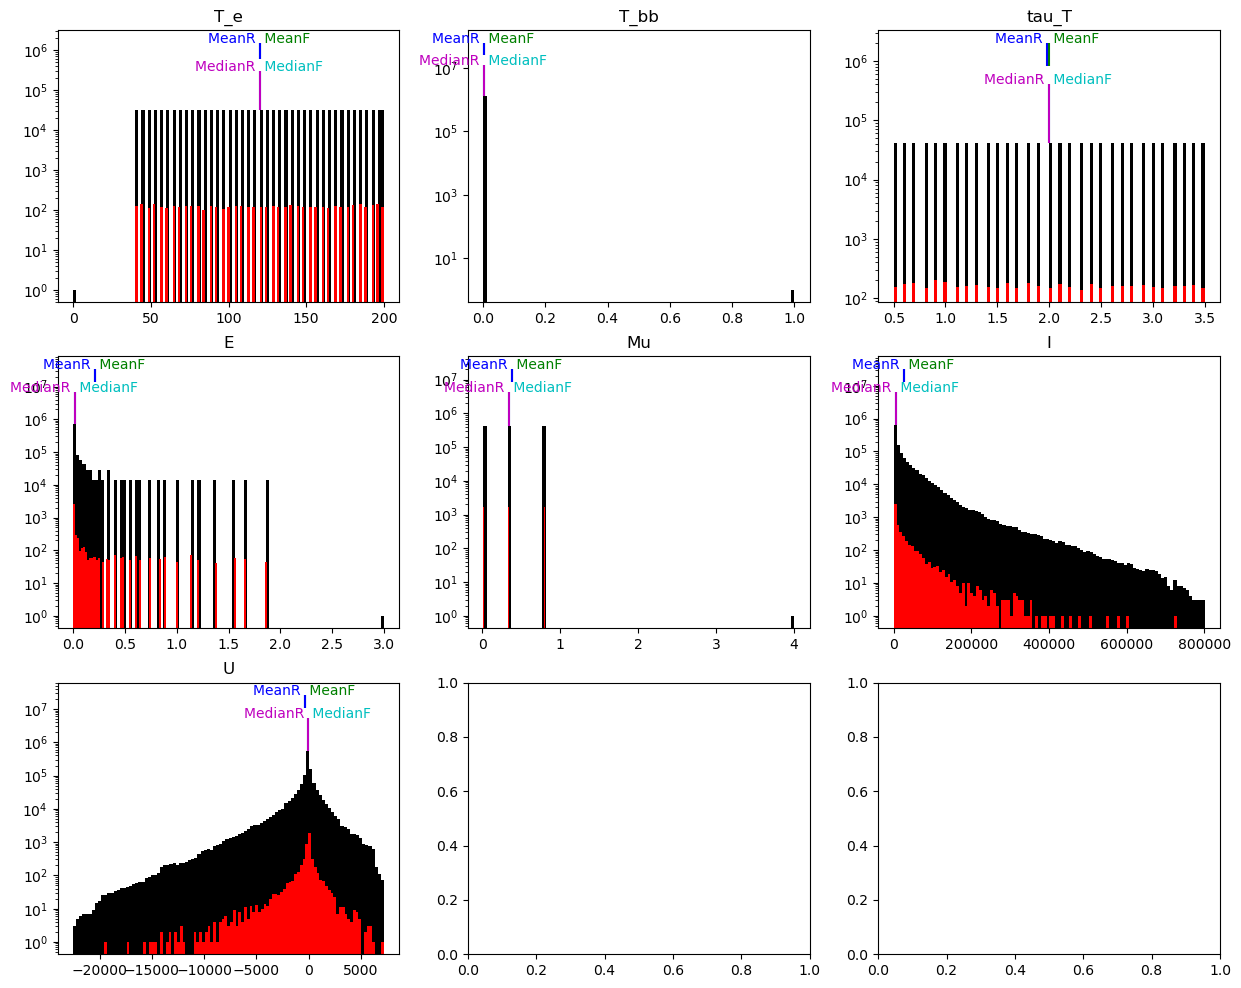

In [8]:
df_small_5K= df.sample(5000)
make_histograms(df,df_small_5K)

In [9]:
df_standardized= pd.DataFrame()
for a, b in enumerate(df):
    df_standardized[b]= scale(df[b])
print(df_standardized)

              T_e        T_bb     tau_T         E         Mu         I  \
0       -2.535455  914.268357  0.000000  6.877423  11.127883 -0.525736   
1       -1.690303   -0.916828 -1.677052 -0.524478  -1.142330 -0.522463   
2       -1.690303   -0.916828 -1.677052 -0.524447   1.293080 -0.510482   
3       -1.690303   -0.916828 -1.677052 -0.524378  -0.150776 -0.512191   
4       -1.690303   -0.916828 -1.677052 -0.524300  -1.142330 -0.516005   
...           ...         ...       ...       ...        ...       ...   
1258286  1.690307    0.915375  1.677052  2.477549   1.293080  0.024566   
1258287  1.690307    0.915375  1.677052  2.872667  -0.150776 -0.115085   
1258288  1.690307    0.915375  1.677052  3.319782  -1.142330 -0.373839   
1258289  1.690307    0.915375  1.677052  3.564942   1.293080 -0.404938   
1258290  1.690307    0.915375  1.677052  4.103156  -0.150776 -0.454098   

                U  
0        0.180581  
1        0.168484  
2        0.176533  
3        0.172246  
4        0.

In [10]:
df.describe()





,T_e,T_bb,tau_T,E,Mu,I,U
count,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06
mean,1.199999e+02,2.000793e-03,2.000000e+00,2.127570e-01,3.868292e-01,2.613431e+04,-2.994199e+02
std,4.732876e+01,1.091583e-03,8.944272e-01,4.052745e-01,3.246954e-01,4.970042e+04,1.691320e+03
min,0.000000e+00,1.000000e-03,5.000000e-01,1.995262e-04,1.591990e-02,4.892186e-20,-2.252708e+04
25%,8.000000e+01,1.400000e-03,1.200000e+00,1.846898e-03,1.591990e-02,1.110355e+03,-3.500909e+02
50%,1.200000e+02,2.000000e-03,2.000000e+00,2.057893e-02,3.378730e-01,6.937283e+03,-1.221008e+01
75%,1.600000e+02,2.600000e-03,2.800000e+00,1.904872e-01,8.066860e-01,2.936317e+04,1.172595e+02
max,2.000000e+02,1.000000e+00,3.500000e+00,3.000000e+00,4.000000e+00,8.009238e+05,7.204209e+03


In [11]:
df_small.describe()

,T_e,T_bb,tau_T,E,Mu,I,U
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,120.063880,0.002001,1.998740,0.211731,0.385554,2.616972e+04,-310.209424
std,47.319867,0.000632,0.894355,0.403517,0.325111,4.975786e+04,1689.267432
min,40.000000,0.001000,0.500000,0.000200,0.015920,2.945017e-18,-21669.654441
25%,80.000000,0.001400,1.200000,0.001847,0.015920,1.126762e+03,-358.473654
50%,120.000000,0.002000,2.000000,0.018186,0.337873,6.974959e+03,-12.556790
75%,160.000000,0.002600,2.800000,0.190487,0.806686,2.926061e+04,114.361430
max,200.000000,0.003000,3.500000,1.875661,0.806686,8.009238e+05,7121.181963


In [12]:
df_small_5K.describe()

,T_e,T_bb,tau_T,E,Mu,I,U
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,120.28320,0.001984,1.978240,0.206856,0.386175,2.537648e+04,-310.401455
std,47.86254,0.000638,0.897773,0.395128,0.325853,5.011743e+04,1693.391710
min,40.00000,0.001000,0.500000,0.000200,0.015920,3.893212e-18,-19543.941131
25%,80.00000,0.001400,1.200000,0.001736,0.015920,1.064660e+03,-342.394316
50%,120.00000,0.002000,2.000000,0.016071,0.337873,6.584863e+03,-12.380621
75%,164.00000,0.002600,2.800000,0.190487,0.806686,2.695723e+04,105.907134
max,200.00000,0.003000,3.500000,1.875661,0.806686,7.299171e+05,7174.844843


# NN with 30K data 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [14]:
# Tensorflow as backend for keras 

import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib
import scipy.stats as stats # for zscore  
!pip install tensorflow

import tensorflow as tf

# Keras for neural networks
from keras.models import load_model
from keras.layers import Input, Dense, Dropout
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

import os
import numpy as np
from collections import Counter

     

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0



In [15]:
df_small_30K = df.sample(30000)
print(df_small_30K)

           T_e    T_bb  tau_T         E        Mu             I            U
626932   120.0  0.0018    2.6  0.839771  0.015920    895.430920    40.593026
1138716  188.0  0.0012    0.9  0.007195  0.337873  14982.161095  -306.017320
238251    68.0  0.0026    1.7  0.001534  0.337873  22914.232170 -1280.904814
436487    96.0  0.0014    1.8  0.481449  0.806686    351.174800    16.219250
1094361  180.0  0.0024    1.2  0.033743  0.337873  73629.815419  1009.373604
...        ...     ...    ...       ...       ...           ...          ...
1256560  200.0  0.0030    1.6  0.243921  0.015920  72476.815925  2410.390826
1237029  200.0  0.0016    1.6  0.215554  0.337873  12430.137320   766.404623
1175307  192.0  0.0016    1.2  1.376975  0.337873    186.474166    13.363848
376677    88.0  0.0016    0.5  0.002847  0.337873  62209.413323  -619.211545
402804    92.0  0.0012    1.6  0.045964  0.337873   4130.411013   317.137305

[30000 rows x 7 columns]


In [16]:
X = df_small_30K.drop(['I','U'],axis=1)
Y = np.log(df_small_30K['I'])


RANDOM_STATE = 42
split_ratio = 0.2


# 80 /20 Split for creating training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_ratio, random_state=RANDOM_STATE)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=split_ratio, random_state=RANDOM_STATE)

In [18]:
# Define the size of the input layer.
n_feat = X_train.shape[1]
x_input = Input(shape=(n_feat,), name="x_input")

# Define the size of the hidden layers (two of them).
x = Dense(128, activation="relu")(x_input)
x = Dense(64, activation="relu")(x)

# Define the size of the output layer.
output = Dense(1)(x)

# Define the model.
model2 = Model(x_input, output)
model2.compile(optimizer = "adam", loss=["mse"])

In [19]:
batch_size = 64
epochs = 30

divie_data_set_by=2

print(model2.summary())
history = model2.fit(X_train[::divie_data_set_by], Y_train[::divie_data_set_by],
                     validation_data = (X_val[::divie_data_set_by], Y_val[::divie_data_set_by]),
                    epochs=epochs, batch_size=batch_size, verbose=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_input (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30

188/188 [==============================] - 4s 10ms/step - loss: 19.6363 - val_loss: 6.5227
Epoch 2/30
188/188 [==============================]

In [20]:
batch_size = 64
epochs = 30
divie_data_set_by=2

#patience defines here how many epochs we wait for an improvement in validation loss before we stop.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

print(model2.summary())
history = model2.fit(X_train[::divie_data_set_by], Y_train[::divie_data_set_by],
                    validation_data = (X_val[::divie_data_set_by], Y_val[::divie_data_set_by]),
                    epochs=epochs, batch_size=batch_size, verbose=True, callbacks=[callback])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_input (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30
188/188 [==============================] - 1s 4ms/step - loss: 1.3511 - val_loss: 1.3312
Epoch 2/30
188/188 [==============================] - 

In [21]:
n_feat = X_train.shape[1]
x_input = Input(shape=(n_feat,), name="x_input")
x = Dense(128, activation="relu")(x_input)

# Add another Dense layer with the same number of units
x = Dense(128, activation="relu")(x)

x = Dense(64, activation="relu")(x)
output = Dense(1)(x)
model2 = Model(x_input, output)
model2.compile(optimizer = "adam", loss=["mse"])

In [22]:
batch_size = 64
epochs = 20
divie_data_set_by=1
# Implement a callback for EarlyStopping.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



print(model2.summary())
history = model2.fit(X_train[::divie_data_set_by], Y_train[::divie_data_set_by],
                    validation_data = (X_val[::divie_data_set_by], Y_val[::divie_data_set_by]),
                    epochs=epochs, batch_size=batch_size, verbose=True, callbacks=[callback])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_input (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25601 (100.00 KB)
Trainable params: 25601 (100.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
375/3

In [23]:
n_feat = X_train.shape[1]
x_input = Input(shape=(n_feat,), name="x_input")
x = Dense(128, activation="relu")(x_input)
x = Dense(128, activation="relu")(x)

# Add a Dropout layer with dropout rate 0.05 here. It is already imported as Dropout()
# and the documentation can be found in the following:
# https://keras.io/api/layers/regularization_layers/dropout/
x = Dropout(.05)(x)

x = Dense(64, activation="relu")(x)
output = Dense(1)(x)
model2 = Model(x_input, output)
model2.compile(optimizer = "adam", loss=["mse"])

In [24]:
batch_size = 64
epochs = 10
divie_data_set_by=1

#patience defines here how many epochs we wait for an improvement in validation loss before we stop.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

print(model2.summary())
history = model2.fit(X_train[::divie_data_set_by], Y_train[::divie_data_set_by],
                    validation_data = (X_val[::divie_data_set_by], Y_val[::divie_data_set_by]),
                    epochs=epochs, batch_size=batch_size, verbose=True, callbacks=[callback])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_input (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_7 (Dense)             (None, 128)               768       
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 25601 (100.00 KB)
Trainable params: 25601 (10

In [25]:
n_feat = X_train.shape[1]

def create_model(params):
    x_input = Input(shape=(n_feat,), name="x_input")
    dropout_values = params["dropout"]

    for i, n_nodes in enumerate(params["arch"]):
        if i == 0:
            x = Dense(n_nodes, activation="relu")(x_input)
        else:
            x = Dense(n_nodes, activation="relu")(x)
        dropout = dropout_values[i]
        x = Dropout(dropout)(x)

    output = Dense(1)(x)

    model2 = Model(x_input, output)
    model2.compile(optimizer="adam", loss=["mse"])

    return model2

In [26]:
batch_size = 64
epochs = 30

# This where you instantly set the network architecture
# Consider the shape of this network, and the intention behind the this dropout.
number_of_neurons_per_layer = [128, 64, 32, 4]
dropout_values = [0.1, 0.05, 0.025, 0.0]

# Here, you initialise the parameters with the input from above.
params = {
        'arch': number_of_neurons_per_layer,
        'batch_size': batch_size,
        'epochs': epochs,
        'dropout': dropout_values
        }

# And now you use the parameters to initialise your model.
model2 = create_model(params)

#patience defines here how many epochs we wait for an improvement in validation loss before we stop.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

print(model2.summary())
history = model2.fit(X_train[::divie_data_set_by], Y_train[::divie_data_set_by],
                    validation_data = (X_val[::divie_data_set_by], Y_val[::divie_data_set_by]),
                    epochs=epochs, batch_size=batch_size, verbose=True, callbacks=[callback])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_input (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_11 (Dense)            (None, 128)               768       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0   

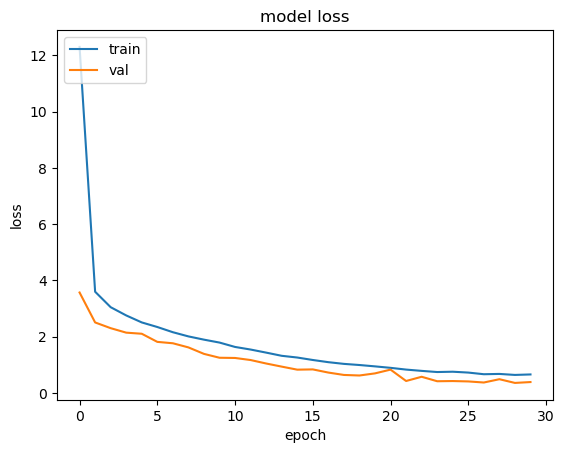

In [28]:
# summarize history for loss: A plot of loss on the training and validation datasets over training epochs.
# summarize history for loss: A plot of loss on the training and validation datasets over training epochs.

plt.plot(history.epoch,*history.history.values())
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
def rmse(y_pred, y_true):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

# These are predictions on the training set
y_pred_train = model2.predict(X_train).flatten()
y_true_train = Y_train

mae_train = mean_absolute_error(y_true_train, y_pred_train)
mse_train = rmse(y_pred_train, y_true_train)**2

rmse_train = rmse(y_pred_train, y_true_train)
pearson_train = np.corrcoef(y_pred_train, y_true_train)[0,1]

print("Training: MAE: {:.3f} | MSE: {:.3f} | RMSE: {:.3f} | Pearson: {:.3f}"
  .format(mae_train, mse_train, rmse_train, pearson_train))


750/750 [==============================] - 3s 2ms/step
Training: MAE: 0.396 | MSE: 0.386 | RMSE: 0.622 | Pearson: 0.989


In [30]:
y_pred_test = model2.predict(X_test).flatten()
y_true_test = Y_test

mae_test = mean_absolute_error(y_true_test, y_pred_test)

mse_test = rmse(y_pred_test, y_true_test)**2
rmse_test = rmse(y_pred_test, y_true_test)

mape_test = mean_absolute_percentage_error(y_pred_test, y_true_test)
pearson_test = np.corrcoef(y_pred_test, y_true_test)[0,1]

print("Test: MAE: {:.3f} | MSE: {:.3f} | RMSE: {:.3f} | MAPE: {:.3f} | Pearson: {:.3f}"
  .format(mae_test, mse_test, rmse_test, mape_test, pearson_test))

188/188 [==============================] - 1s 2ms/step
Test: MAE: 0.393 | MSE: 0.383 | RMSE: 0.619 | MAPE: 0.068 | Pearson: 0.989


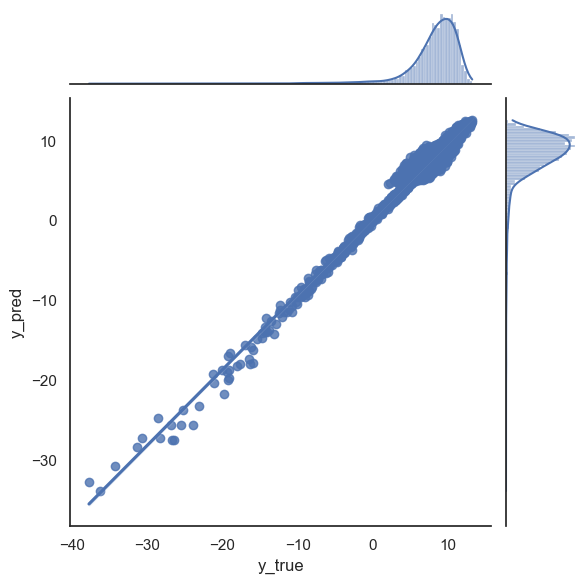

In [31]:
y_true = Y_test
y_pred = y_pred_test

#Convert validation predictions to pandas dataframe
df_pred = pd.DataFrame({'y_true':y_true, 'y_pred': y_pred})

# Create scatter plot with histograms for visualizing the density
sns.set(style="white", color_codes=True)
g = sns.jointplot(x='y_true', y='y_pred', data=df_pred, kind="reg")